# Bibliotecas

In [2]:
%run libs.py

# Ingest Data

In [3]:
df_militares = pd.read_csv('data/servidores_militares/df_militares.csv.gz', compression='gzip')
df_militares.shape

/Users/mattosoerick/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(376678, 45)

# EDA

In [4]:
df_militares.sample()

,Unnamed: 0,Id_SERVIDOR_PORTAL,NOME,CPF,MATRICULA,DESCRICAO_CARGO,CLASSE_CARGO,REFERENCIA_CARGO,PADRAO_CARGO,NIVEL_CARGO,SIGLA_FUNCAO,NIVEL_FUNCAO,FUNCAO,CODIGO_ATIVIDADE,ATIVIDADE,OPCAO_PARCIAL,COD_UORG_LOTACAO,UORG_LOTACAO,COD_ORG_LOTACAO,ORG_LOTACAO,COD_ORGSUP_LOTACAO,ORGSUP_LOTACAO,COD_UORG_EXERCICIO,UORG_EXERCICIO,COD_ORG_EXERCICIO,ORG_EXERCICIO,COD_ORGSUP_EXERCICIO,ORGSUP_EXERCICIO,TIPO_VINCULO,SITUACAO_VINCULO,DATA_INICIO_AFASTAMENTO,DATA_TERMINO_AFASTAMENTO,REGIME_JURIDICO,JORNADA_DE_TRABALHO,DATA_INGRESSO_CARGOFUNCAO,DATA_NOMEACAO_CARGOFUNCAO,DATA_INGRESSO_ORGAO,DOCUMENTO_INGRESSO_SERVICOPUBLICO,DATA_DIPLOMA_INGRESSO_SERVICOPUBLICO,DIPLOMA_INGRESSO_CARGOFUNCAO,DIPLOMA_INGRESSO_ORGAO,DIPLOMA_INGRESSO_SERVICOPUBLICO,UF_EXERCICIO,file,unique_id
90489,90489,7603506,EDEMILSON LEITES RIBEIRO,***.170.680-**,022****,Segundo-Sargento,0,0,0,0,-1,-1,Sem informação,-1,Sem informação,NaN,-1,Sem informação,16000,Comando do Exército,40105,Ministério da Defesa,-1,Sem informação,16000,Comando do Exército,40105,Ministério da Defesa,2,MILITAR DA ATIVA,NaN,NaN,ESTATUTO DOS MILITARES,DSPN. PERMANENTE,NaN,NaN,NaN,024,NaN,NaN,Sem informação,BOLETIM INTERNO,-1,201505,EDEMILSON LEITES RIBEIRO***170680**


In [5]:
df_militares.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376678 entries, 0 to 376677
Data columns (total 45 columns):
Unnamed: 0                              376678 non-null int64
Id_SERVIDOR_PORTAL                      376678 non-null int64
NOME                                    376678 non-null object
CPF                                     376678 non-null object
MATRICULA                               376678 non-null object
DESCRICAO_CARGO                         376678 non-null object
CLASSE_CARGO                            376678 non-null int64
REFERENCIA_CARGO                        376678 non-null int64
PADRAO_CARGO                            376678 non-null int64
NIVEL_CARGO                             376678 non-null int64
SIGLA_FUNCAO                            376678 non-null int64
NIVEL_FUNCAO                            376678 non-null int64
FUNCAO                                  376678 non-null object
CODIGO_ATIVIDADE                        376678 non-null int64
ATIVIDADE       

## Pessoas homônimas

In [6]:
df_militares['NOME'].value_counts().head()

MARCOS ANTONIO DA SILVA    23
JULIO CESAR DA SILVA       20
PAULO HENRIQUE DA SILVA    20
ANDRE LUIZ DA SILVA        19
PAULO CESAR DA SILVA       18
Name: NOME, dtype: int64

A única chave única de uma pessoa é o CPF. No caso do nosso DF temos apenas 6 digitos, causando a possibilidade de esses números se repetirem para outras pessoas, como o caso do exemplo abaixo.

In [7]:
df_militares[df_militares['CPF'].str.contains("038.987")]['NOME'].value_counts()

MATHEUS MELLO ARAUJO DE SOUZA      1
ROBERTO SALES DE SOUSA             1
IZACK ARIEIRA FERREIRA DA SILVA    1
DANIELE PIRES DE JESUS LEMOS       1
DOUGLAS SCHELBANER VARGAS          1
ANDRE CORREIA TELES DE MENEZES     1
LUCAS MORENO SILVA                 1
JOSIEL CABRAL FRANCISCO            1
Name: NOME, dtype: int64

In [8]:
# A única forma de termos uma chave única é comparar o `NOME` mais `CPF`
df_militares['unique_id'] = df_militares['NOME'] + " - " +df_militares['CPF'].str.replace('[\.\-\*]', '',regex=True)

In [9]:
# Quantidade chaves únicas
print("Total de chaves únicas = " + str(df_militares['unique_id'].nunique()))
df_militares['unique_id'].value_counts().head()

Total de chaves únicas = 376657


RODRIGO LEANDRO GOMES DA SILVA - 500944      2
RAFAEL MACHADO EUSTAQUIO - 083927            2
VICTOR NORONHA SOARES - 340926               2
LUIS VENANCIO COUTINHO CONCEICAO - 966685    2
FABIO DINIZ DOS SANTOS - 577967              2
Name: unique_id, dtype: int64

In [10]:
# Mais de um registro da mesma pessoa pode ser progressão de carreira.
# Vamos pegar um exemplo para analisar
df_militares[df_militares['unique_id']==("LUCAS DA SILVA VIDAL - 616497")]

,Unnamed: 0,Id_SERVIDOR_PORTAL,NOME,CPF,MATRICULA,DESCRICAO_CARGO,CLASSE_CARGO,REFERENCIA_CARGO,PADRAO_CARGO,NIVEL_CARGO,SIGLA_FUNCAO,NIVEL_FUNCAO,FUNCAO,CODIGO_ATIVIDADE,ATIVIDADE,OPCAO_PARCIAL,COD_UORG_LOTACAO,UORG_LOTACAO,COD_ORG_LOTACAO,ORG_LOTACAO,COD_ORGSUP_LOTACAO,ORGSUP_LOTACAO,COD_UORG_EXERCICIO,UORG_EXERCICIO,COD_ORG_EXERCICIO,ORG_EXERCICIO,COD_ORGSUP_EXERCICIO,ORGSUP_EXERCICIO,TIPO_VINCULO,SITUACAO_VINCULO,DATA_INICIO_AFASTAMENTO,DATA_TERMINO_AFASTAMENTO,REGIME_JURIDICO,JORNADA_DE_TRABALHO,DATA_INGRESSO_CARGOFUNCAO,DATA_NOMEACAO_CARGOFUNCAO,DATA_INGRESSO_ORGAO,DOCUMENTO_INGRESSO_SERVICOPUBLICO,DATA_DIPLOMA_INGRESSO_SERVICOPUBLICO,DIPLOMA_INGRESSO_CARGOFUNCAO,DIPLOMA_INGRESSO_ORGAO,DIPLOMA_INGRESSO_SERVICOPUBLICO,UF_EXERCICIO,file,unique_id
224027,224027,2011266,LUCAS DA SILVA VIDAL,***.616.497-**,061****,Soldado-Recruta,0,0,0,0,-1,-1,Sem informação,-1,Sem informação,NaN,-1,Sem informação,16000,Comando do Exército,40105,Ministério da Defesa,-1,Sem informação,16000,Comando do Exército,40105,Ministério da Defesa,2,MILITAR DA ATIVA,NaN,NaN,ESTATUTO DOS MILITARES,DSPN. PERMANENTE,NaN,NaN,NaN,007,NaN,NaN,Sem informação,OUTROS,-1,201505,LUCAS DA SILVA VIDAL - 616497
224028,224028,2011266,LUCAS DA SILVA VIDAL,***.616.497-**,050****,Aprendiz-Marinheiro,0,0,0,0,-1,-1,Sem informação,-1,Sem informação,NaN,-1,Sem informação,70000,Comando da Marinha,40105,Ministério da Defesa,-1,Sem informação,70000,Comando da Marinha,40105,Ministério da Defesa,2,MILITAR DA ATIVA,NaN,NaN,ESTATUTO DOS MILITARES,DSPN. PERMANENTE,NaN,NaN,NaN,18-EAMSC,NaN,NaN,Sem informação,Inválido,-1,201505,LUCAS DA SILVA VIDAL - 616497


### Atividades

In [11]:
def plot_col(dataframe, col):
    #Graph    
    chart = (dataframe[col].value_counts()).plot(kind='bar', align='center', figsize=(12,5))
    chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
    plt.title(col)
    #Amounts
    df_col = pd.DataFrame(dataframe[col].value_counts())
    df_col['%'] = (df_col[col]/df_col[col].sum()).round(2)
    return df_col.head()

,ORG_EXERCICIO,%
Comando do Exército,228523,0.61
Comando da Marinha,76358,0.20
Comando da Aeronáutica,71797,0.19


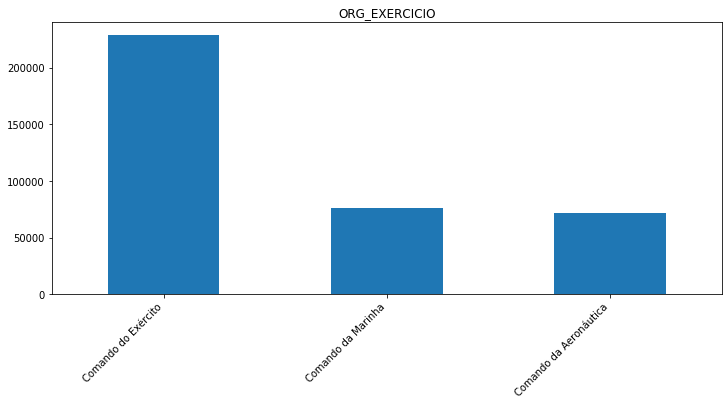

In [12]:
plot_col(df_militares,'ORG_EXERCICIO')
# De 2013 até hoje tivemos mais de 60% do quadro de militares trabalhando no Exército

,DESCRICAO_CARGO,%
Soldado-Recruta,65046,0.17
Soldado,51118,0.14
Cabo (engajado),47377,0.13
Terceiro-Sargento,43019,0.11
Segundo-Sargento,28164,0.07


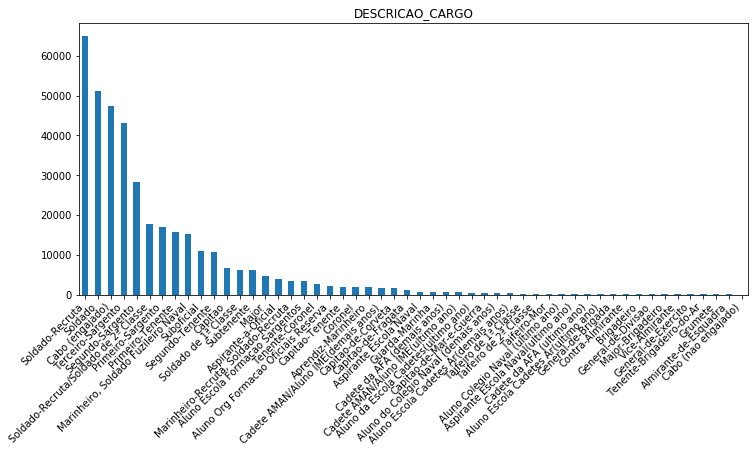

In [13]:
plot_col(df_militares,'DESCRICAO_CARGO')
# De 2013 até hoje tivemos mais de 40% do quadro de militares atuando como Soldado

In [14]:
# cargos no exército

,DESCRICAO_CARGO,%
Soldado-Recruta,65046,0.28
Soldado,51118,0.22
Cabo (engajado),25244,0.11
Terceiro-Sargento,20581,0.09
Segundo-Sargento,16933,0.07


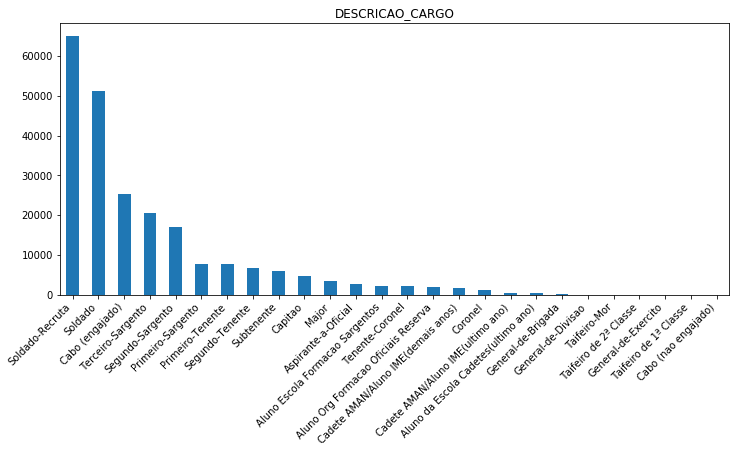

In [15]:
exercito=df_militares[df_militares["ORG_EXERCICIO"]=="Comando do Exército"]
plot_col(exercito,'DESCRICAO_CARGO')

,DESCRICAO_CARGO,%
Soldado-Recruta/Soldado de 2ª Classe,17690,0.25
Terceiro-Sargento,12087,0.17
Soldado de 1ª Classe,6144,0.09
Cabo (engajado),6023,0.08
Segundo-Sargento,5499,0.08


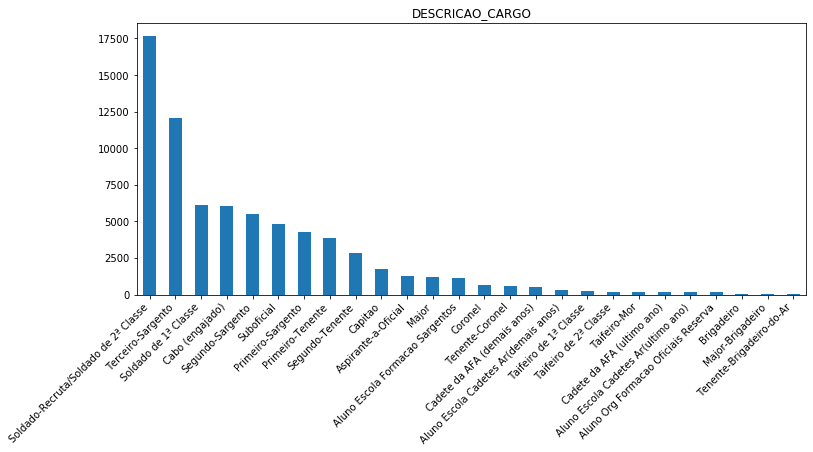

In [16]:
Aeronáutica=df_militares[df_militares["ORG_EXERCICIO"]=="Comando da Aeronáutica"]
plot_col(Aeronáutica,'DESCRICAO_CARGO')

,DESCRICAO_CARGO,%
Cabo (engajado),16110,0.21
"Marinheiro, Soldado Fuzileiro Naval",15159,0.20
Terceiro-Sargento,10351,0.14
Suboficial,6080,0.08
Segundo-Sargento,5732,0.08


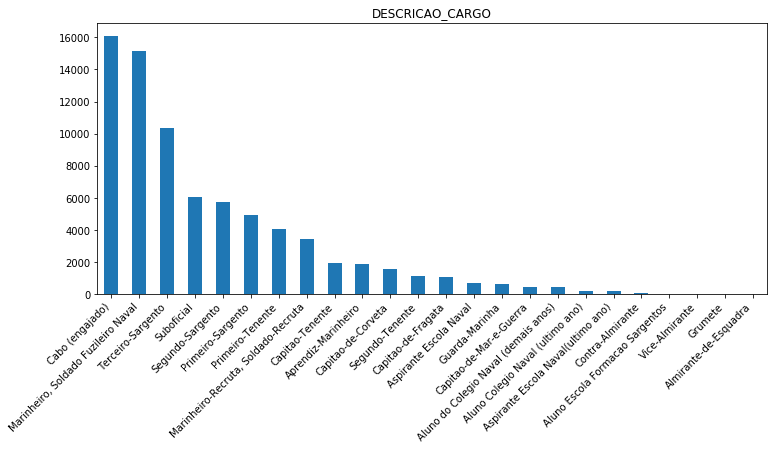

In [17]:
Marinha=df_militares[df_militares["ORG_EXERCICIO"]=="Comando da Marinha"]
plot_col(Marinha,'DESCRICAO_CARGO')

In [26]:
df_militares[~(df_militares['DESCRICAO_CARGO'].str.contains('Soldado'))]

(218074, 45)